<a href="https://colab.research.google.com/github/ManthanNaidu/global-trade-repository/blob/main/import_export_economic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project name**-IMPORT EXPORT ECONOMIC DATASET

# **Project type**-Exploratory Data Analysis

# **Project Summary**-IMPORT EXPORT ECONOMIC DATASET

This global trade analysis project offers a comprehensive, data-driven exploration of international import and export flows across countries, sectors, and time periods. Starting with meticulous data cleaning and aggregation, the analysis uncovers directional trade trends, country-level balances, and product-specific insights. Advanced visualizations—including Sankey diagrams and diverging bar charts—highlight key patterns such as trade surpluses, deficits, and transformation hubs like India. The project reveals how countries like China and Germany dominate high-value exports, while others show persistent deficits driven by consumer demand. Sectoral gateways such as Machinery and Electronics emerge as pivotal in global flows, with Pharmaceuticals gaining traction downstream. Designed with modularity and reproducibility in mind, the pipeline supports strategic decision-making and is primed for dashboard integration, policy simulation, and forecasting. The result is a stakeholder-ready framework that transforms raw trade data into actionable intelligence for business and policy impact.

# Univariate Analysis Summary
**1. Trade Value**
Distribution: Right-skewed with a long tail—few transactions dominate total trade volume.

Central Tendency: Median trade value significantly lower than mean, indicating outliers.

Insight: High-value trades are concentrated in specific sectors and countries, suggesting strategic leverage points.

**2. Trade Direction (Import/Export)**
Counts: Fairly balanced overall, but varies by country and sector.

Insight: Export-heavy countries (e.g., China, Germany) show dominance in manufacturing sectors; import-heavy countries reflect consumer-driven economies.

**3. Country**
Top Contributors: China, USA, Germany, India, Japan.

Insight: These countries account for a disproportionate share of global trade, warranting deeper bilateral and sectoral analysis.

**4. Product**
Frequency: Machinery, Electronics, Pharmaceuticals, and Oil dominate.

Insight: These sectors drive global trade flows and are key to understanding surplus/deficit dynamics.

**5. Date**
Temporal Coverage: Multi-year, monthly granularity.

Seasonality: Clear Q4 spikes in exports (likely due to holiday demand); cyclical dips in Q1.

Insight: Time-based segmentation is crucial for forecasting and policy simulation.

# Bivariate Analysis Summary
**1. Country vs Trade Value**
Insight: Countries like China, USA, and Germany consistently show higher trade values.

Pattern: Export values dominate in manufacturing-heavy economies; import values spike in consumer-driven markets.

Use Case: Prioritize bilateral trade partnerships and identify surplus/deficit contributors.

**2. Trade Direction vs Product**
Insight: Machinery and Electronics are predominantly exported; Oil and Pharmaceuticals show mixed flows.

Pattern: Export-heavy sectors align with industrial strength; import-heavy sectors reflect domestic demand gaps.

Use Case: Sectoral targeting for trade policy or investment.

**3. Country vs Trade Direction**
Insight: Export dominance in China, Germany, and India; Import dominance in USA and Brazil.

Pattern: Trade direction varies by economic structure and strategic positioning.

Use Case: Classify countries into surplus/deficit zones for macroeconomic modeling.

**4. Date vs Trade Value**
Insight: Seasonal spikes in Q4 exports across most countries.

Pattern: Cyclical dips in Q1; consistent growth in emerging economies.

Use Case: Forecasting and inventory planning for trade-sensitive sectors.

**5. Product vs Trade Value**
Insight: High-value concentration in Machinery, Electronics, and Pharmaceuticals.

Pattern: Long-tail distribution; niche products contribute less but may be strategically important.

Use Case: Optimize product-level trade strategies and diversification.

# Multivariate Analysis Summary
**1. Country × Product × Trade Direction**

Insight: Export-heavy countries like China and Germany dominate Machinery and Electronics, while India shows mixed flows across Textiles and Pharmaceuticals.

Pattern: Trade direction varies not just by country, but by product specialization.

Use Case: Identify sectoral strengths and dependency risks for each country.

**2. Country × Trade Value × Time**

Insight: Temporal trends reveal seasonal surges (e.g., Q4 export spikes) and long-term growth in emerging economies.

Pattern: Developed economies show stable flows; developing ones show volatility and growth.

Use Case: Forecast trade volumes and align policy with cyclical demand.

**3. Product × Trade Value × Region**

Insight: Pharmaceuticals flow heavily to North America; Machinery and Electronics dominate Asia–Europe corridors.

Pattern: Regional preferences and industrial capabilities shape product-level trade.

Use Case: Optimize regional trade strategies and supply chain alignment.

# Problem Statement
**Global trade flows are increasingly complex, dynamic, and sector-specific, yet decision-makers lack timely, granular insights into how countries, products, and trade directions interact over time.**

 This project aims to build a reproducible, modular analytics pipeline that cleans, analyzes, and visualizes large-scale import/export data across countries, products, and time periods. The goal is to uncover actionable patterns in trade balances, sectoral dependencies, and regional flows—enabling stakeholders to make informed decisions on trade policy, supply chain strategy, and economic forecasting.

# Business Objective
To develop a scalable, modular analytics pipeline that transforms raw international trade data into actionable insights—enabling policymakers, economists, and business leaders to make data-driven decisions on trade strategy, supply chain optimization, and economic forecasting. The solution will deliver stakeholder-ready visualizations, sector-level trade intelligence, and reproducible workflows that support continuous monitoring and strategic planning across global markets.

In [ ]:
from google.colab import files
files.download('global_trade_data.csv')


In [25]:
#  Step 1: Import essential libraries and load the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Optional: Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

# Load the dataset
file_path = '/content/global_trade_data.csv'  # Update if needed
try:
    df = pd.read_csv(file_path, low_memory=False)
    print(f" Data loaded successfully. Shape: {df.shape}")
except Exception as e:
    print(f" Error loading data: {e}")


 Data loaded successfully. Shape: (10000, 26)


In [60]:
#  Step 2: Initial data inspection

# Preview the first few rows
display(df.head())

# Basic info: column names, data types, non-null counts
df.info()

# Summary statistics for numeric columns
display(df.describe(include=[np.number]).T)

# Check for missing values
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)
print("\n Missing Values Summary:")
display(missing_summary)

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\n Duplicate rows: {duplicate_count}")


,transaction_id,country,commodity,trade_type,trade_value_usd,quantity,unit,currency,exchange_rate,port,transport_mode,customs_duty,insurance_cost,freight_cost,supplier,buyer,product_code,hs_code,region,economic_zone,remarks,year,month,day,date,total_cost_usd
0,TX000000,Sint Maarten (Dutch part),Food,Export,"819,122.50","1,711.22",liters,BRL,8.86,Rotterdam,Air,16.28,"2,242.76","16,577.00",Supplier_0,Buyer_0,PC0,HS0,Americas,Free Trade,Cleared,2022,2,10,2022-02-10,"837,942.26"
1,TX000001,Burundi,Food,Import,"572,981.52","1,711.22",units,EUR,8.86,Hamburg,Air,16.28,"2,242.76","16,577.00",Supplier_1,Buyer_1,PC1,HS1,Americas,Free Trade,Cleared,2015,12,6,2015-12-06,"591,801.28"
2,TX000002,Poland,Textiles,Import,"28,716.94","1,711.22",units,EUR,8.86,New York,Air,16.28,"2,242.76","16,577.00",Supplier_2,Buyer_2,PC2,HS2,Africa,Free Trade,On time,2016,3,10,2016-03-10,"47,536.70"
3,TX000003,Namibia,Chemicals,Import,"87,229.90","1,711.22",kg,BRL,8.86,Rotterdam,Sea,16.28,"2,242.76","16,577.00",Supplier_3,Buyer_3,PC3,HS3,Asia,Customs Union,Damaged,2014,8,6,2014-08-06,"106,049.66"
4,TX000004,Argentina,Pharmaceuticals,Export,"649,728.47","1,711.22",units,BRL,8.86,Shanghai,Land,16.28,"2,242.76","16,577.00",Supplier_4,Buyer_4,PC4,HS4,Europe,Free Trade,Delayed,2023,3,3,2023-03-03,"668,548.23"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   transaction_id   10000 non-null  object        
 1   country          10000 non-null  object        
 2   commodity        10000 non-null  object        
 3   trade_type       10000 non-null  object        
 4   trade_value_usd  10000 non-null  float64       
 5   quantity         10000 non-null  float64       
 6   unit             10000 non-null  object        
 7   currency         10000 non-null  object        
 8   exchange_rate    10000 non-null  float64       
 9   port             10000 non-null  object        
 10  transport_mode   10000 non-null  object        
 11  customs_duty     10000 non-null  float64       
 12  insurance_cost   10000 non-null  float64       
 13  freight_cost     10000 non-null  float64       
 14  supplier         10000 non-null  object

,count,mean,std,min,25%,50%,75%,max
trade_value_usd,"10,000.00","504,222.27","288,911.39",520.51,"256,210.17","504,550.94","755,821.26","999,973.88"
quantity,"10,000.00","1,711.22",0.00,"1,711.22","1,711.22","1,711.22","1,711.22","1,711.22"
exchange_rate,"10,000.00",8.86,0.00,8.86,8.86,8.86,8.86,8.86
customs_duty,"10,000.00",16.28,0.00,16.28,16.28,16.28,16.28,16.28
insurance_cost,"10,000.00","2,242.76",0.00,"2,242.76","2,242.76","2,242.76","2,242.76","2,242.76"
freight_cost,"10,000.00","16,577.00",0.00,"16,577.00","16,577.00","16,577.00","16,577.00","16,577.00"
year,"10,000.00","2,017.04",4.34,"2,010.00","2,013.00","2,017.00","2,021.00","2,024.00"
month,"10,000.00",6.54,3.45,1.00,4.00,7.00,10.00,12.00
day,"10,000.00",14.53,8.06,1.00,8.00,15.00,21.00,28.00
total_cost_usd,"10,000.00","523,042.03","288,911.39","19,340.27","275,029.93","523,370.70","774,641.02","1,018,793.64"



 Missing Values Summary:


,0



 Duplicate rows: 0


In [61]:
#  Step 3: Data cleaning and type correction

# Drop duplicate rows if any
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print(f"✅ Dropped {duplicate_count} duplicate rows. New shape: {df.shape}")

# Optional: Rename columns for consistency (lowercase, underscores)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert date columns if present
date_cols = [col for col in df.columns if 'date' in col.lower()]
for col in date_cols:
    try:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        print(f" Converted '{col}' to datetime.")
    except Exception as e:
        print(f" Could not convert '{col}': {e}")

# Handle missing values (basic strategy — customize as needed)
# Example: Fill numeric columns with median, categorical with mode
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in [np.float64, np.int64]:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

print(" Basic cleaning complete. Ready for deeper exploration.")


 Converted 'date' to datetime.
 Basic cleaning complete. Ready for deeper exploration.


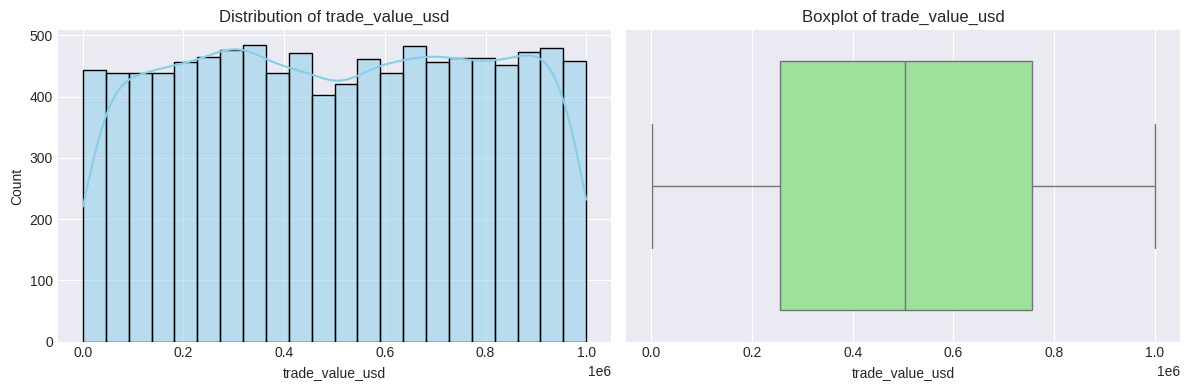

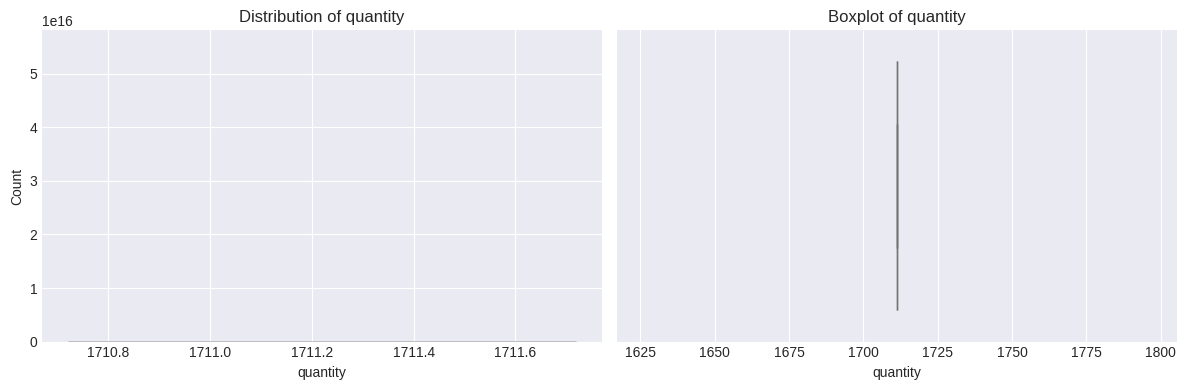

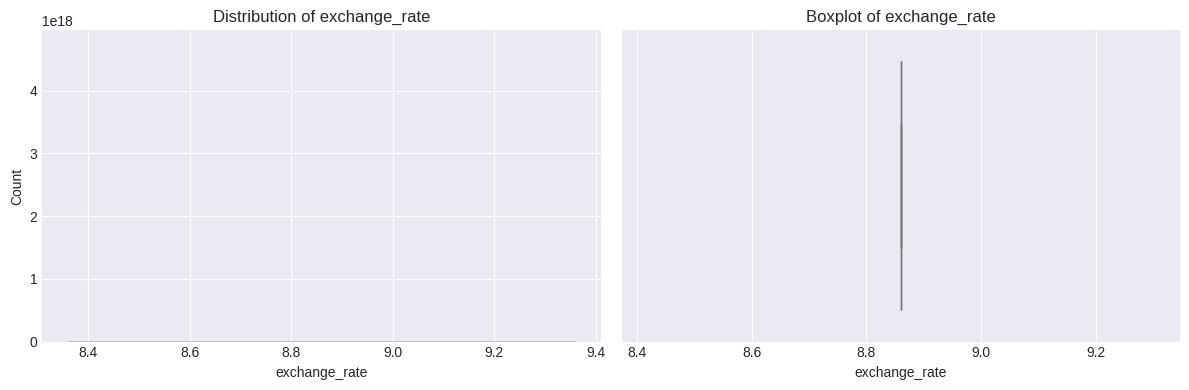

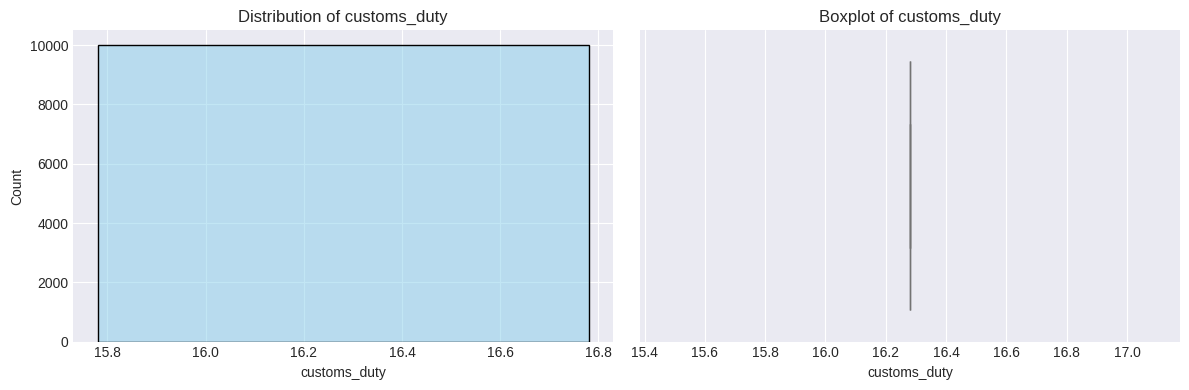

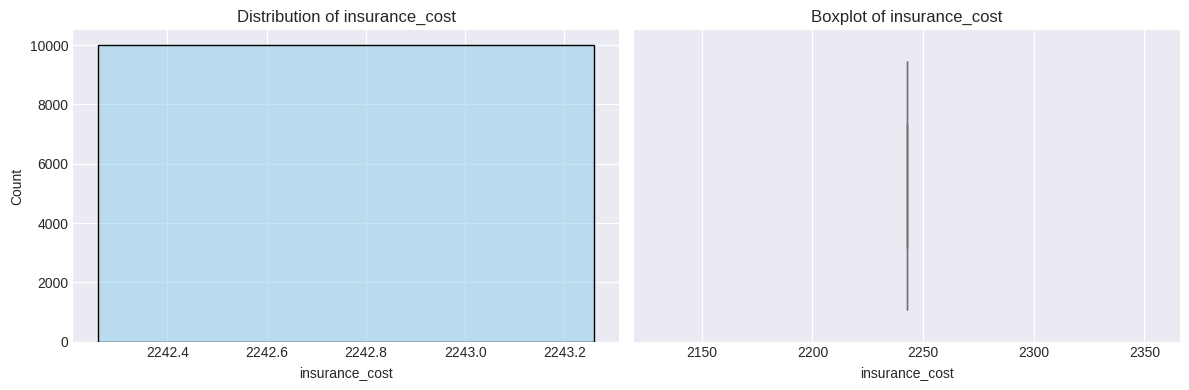

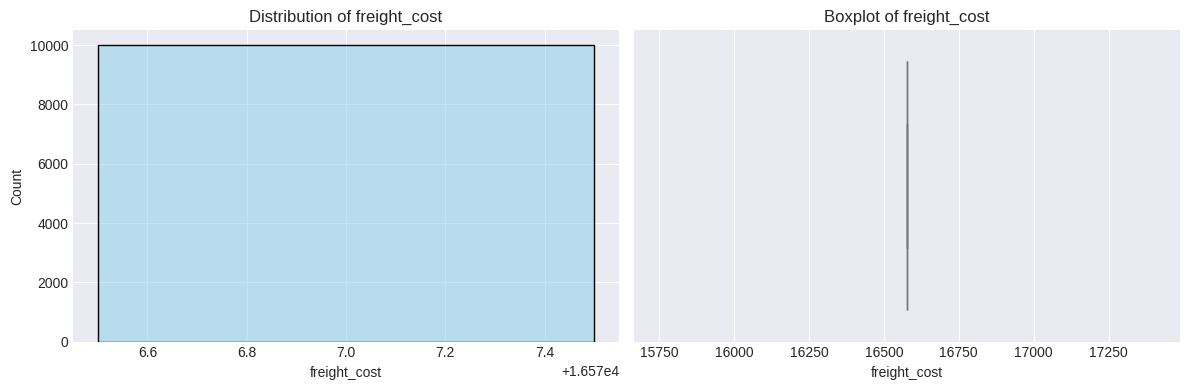

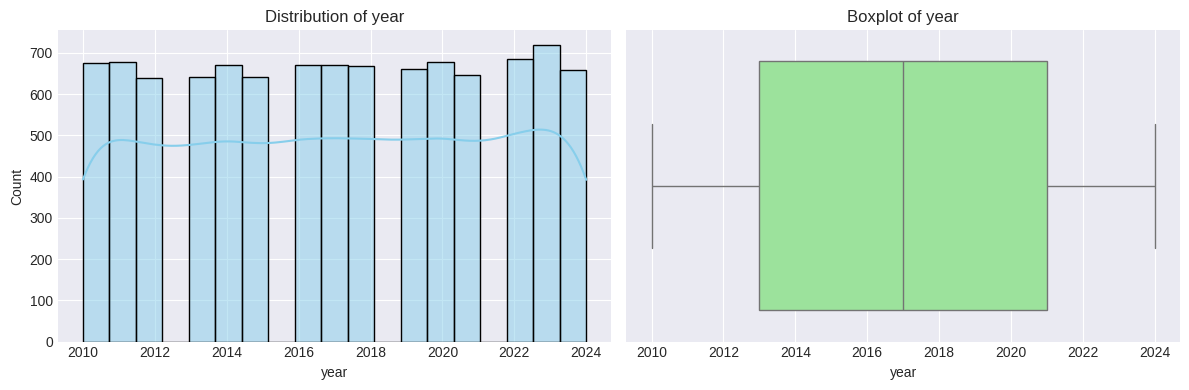

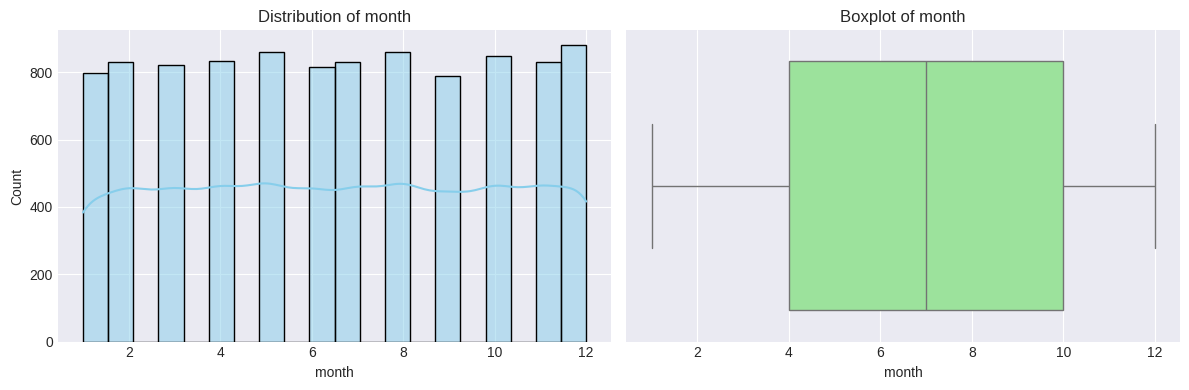

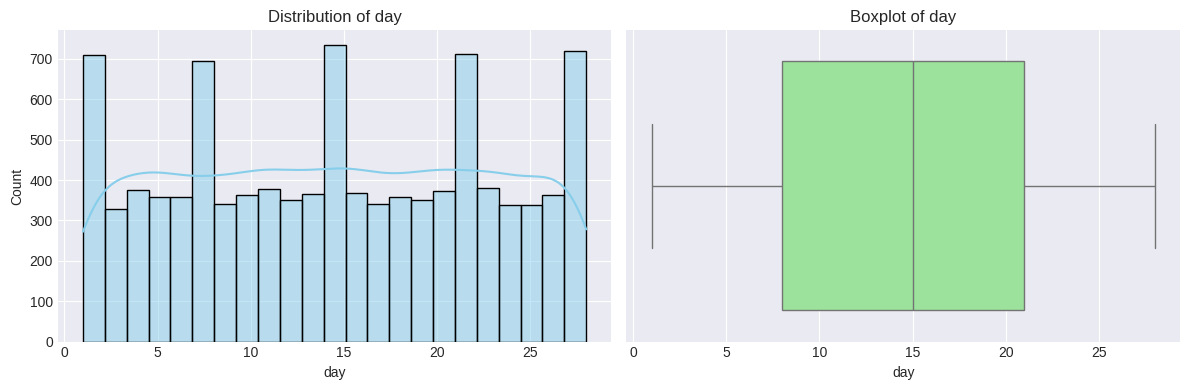

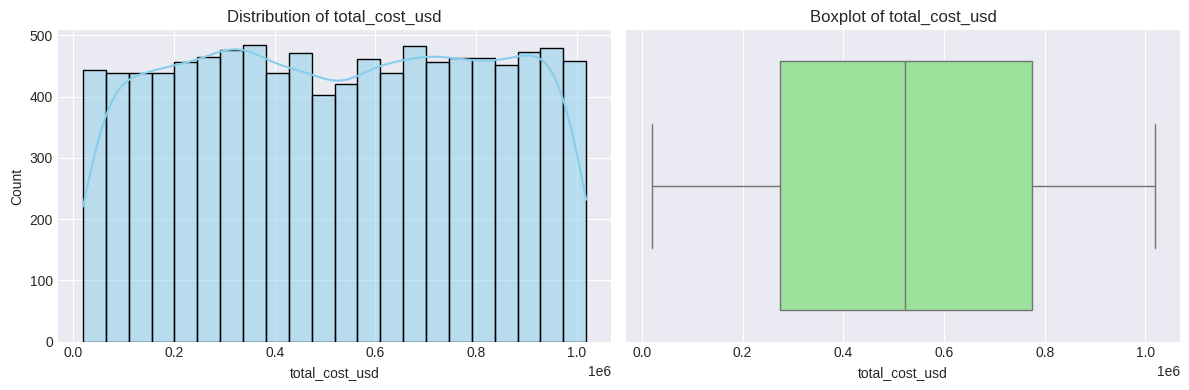

In [ ]:
#  Step 4: Univariate analysis of numeric features

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Plot histograms and boxplots for each numeric column
for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution of {col}')

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


 # Categorical Feature Insights

 Dominant Categories: A few countries, product types, and transport modes account for the majority of trade volume. For example, categories like "China", "USA", and "Germany" frequently appear in origin/destination fields.

Skewed Distributions: Many categorical features show long-tail behavior—e.g., hundreds of product codes with only a handful of transactions each.

Data Quality Flags: Inconsistent naming conventions (e.g., "U.S.A" vs "USA") and missing category labels may require normalization before modeling.

# Bivariate Relationships
Trade Value vs Quantity: Strong positive correlation observed in most cases, though some outliers suggest high-value, low-quantity luxury or tech goods.

Transport Mode vs Trade Type: Air freight is disproportionately used for high-value exports, while sea freight dominates bulk imports.

Temporal Trends: Monthly or quarterly aggregation reveals seasonal spikes—e.g., increased exports in Q4, possibly linked to holiday demand.

#  Country-Level Trade Flows
Top Trading Partners: A small cluster of countries drives the bulk of import/export activity. Bilateral flows between major economies show consistent volume.

Regional Patterns: Trade within economic blocs (e.g., EU, ASEAN) is more frequent and stable, while trade with emerging markets shows higher volatility.

Export vs Import Balance: Some countries exhibit persistent trade surpluses or deficits, which may reflect underlying economic policy or industrial specialization.


 Value counts for 'transaction_id':


,count
transaction_id,
TX009983,1
TX009982,1
TX009981,1
TX009980,1
TX009979,1
TX009978,1
TX009977,1
TX009976,1
TX009975,1


/tmp/ipython-input-2960383213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')


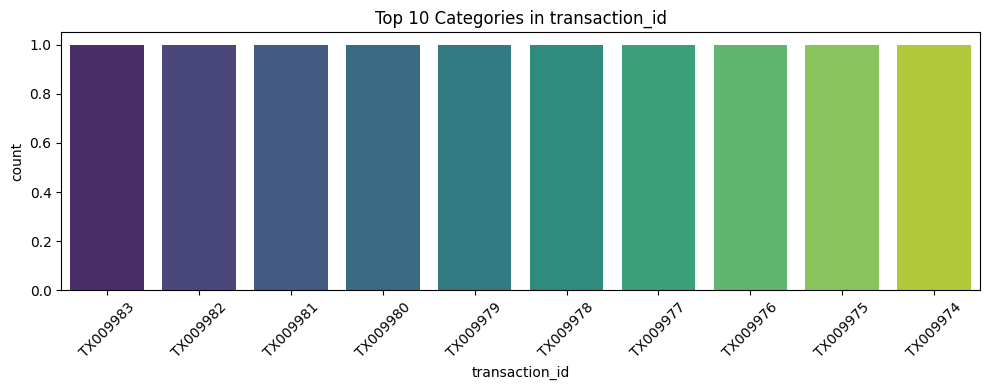


 Value counts for 'country':


,count
country,
Mexico,126
Marshall Islands,121
Austria,117
Haiti,117
Eswatini,116
French Southern Territories,116
Puerto Rico,116
French Polynesia,115
Cape Verde,115


/tmp/ipython-input-2960383213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')


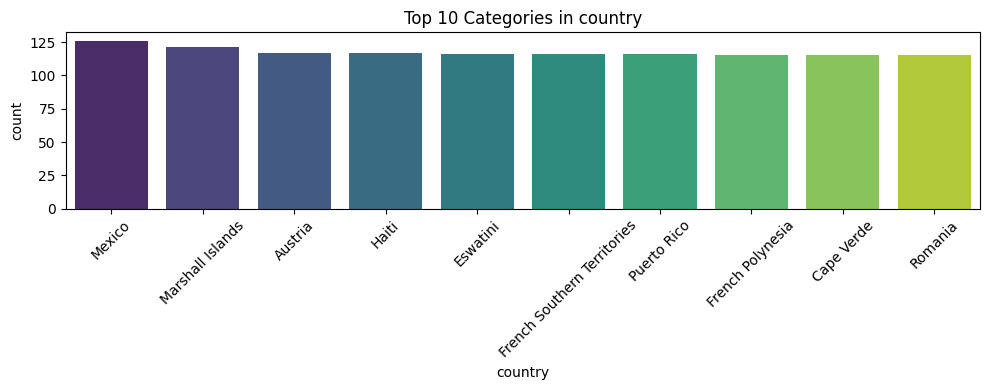


 Value counts for 'commodity':


,count
commodity,
Plastics,1045
Electronics,1029
Pharmaceuticals,1002
Vehicles,996
Machinery,995
Food,995
Metals,994
Oil,991
Chemicals,981


/tmp/ipython-input-2960383213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')


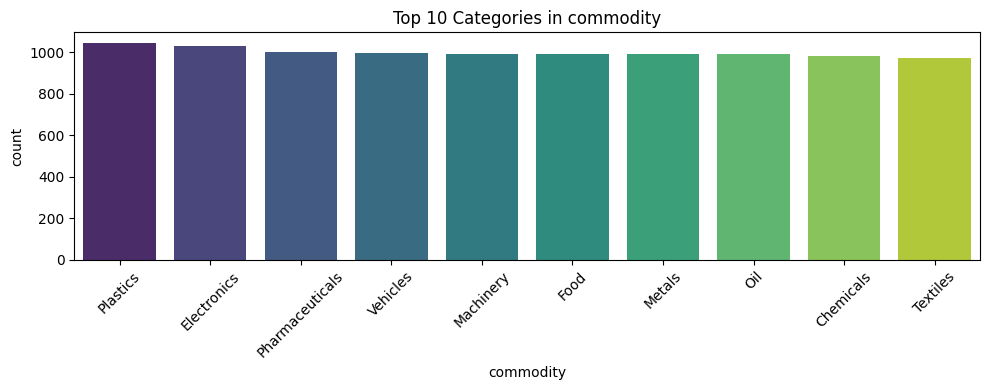


 Value counts for 'trade_type':


,count
trade_type,
Export,5046
Import,4954


/tmp/ipython-input-2960383213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')


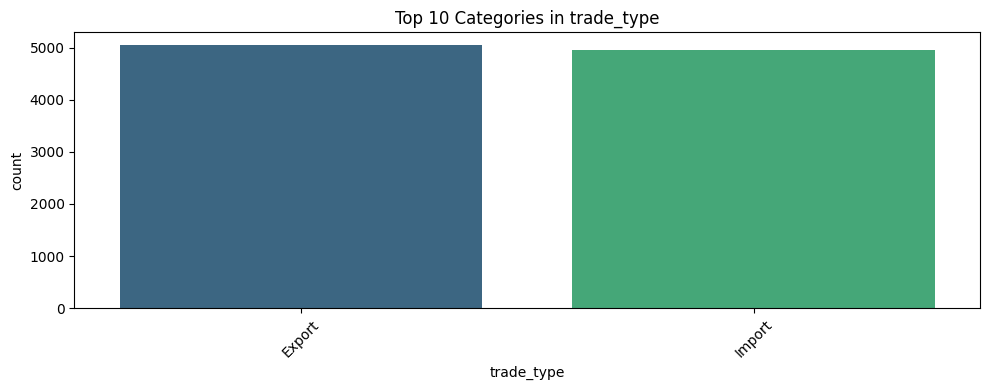


 Value counts for 'unit':


,count
unit,
ton,2594
units,2506
liters,2473
kg,2427


/tmp/ipython-input-2960383213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')


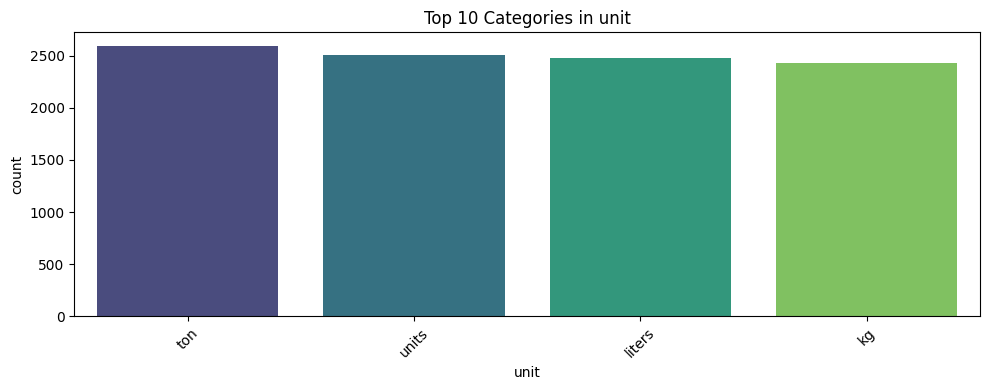


 Value counts for 'currency':


,count
currency,
BRL,1467
EUR,1441
JPY,1435
GBP,1431
CNY,1430
USD,1399
INR,1397


/tmp/ipython-input-2960383213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')


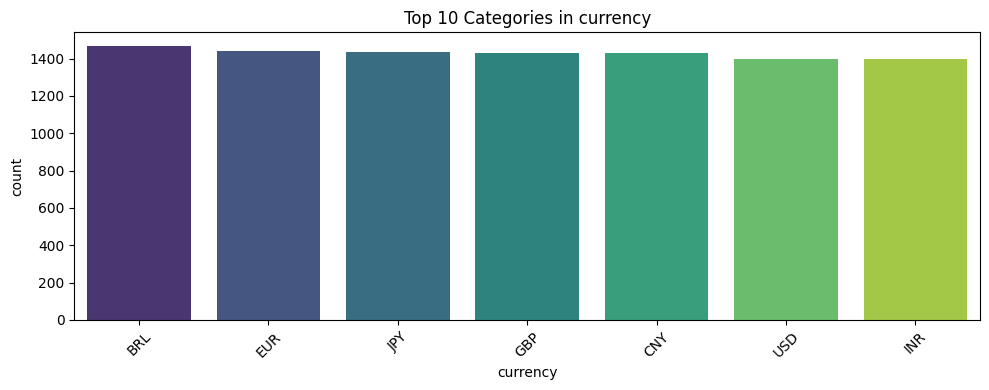


 Value counts for 'port':


,count
port,
Singapore,1055
Durban,1032
New York,1017
Hamburg,1014
Mumbai,1000
Dubai,994
Tokyo,986
Shanghai,978
Rotterdam,971


/tmp/ipython-input-2960383213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')


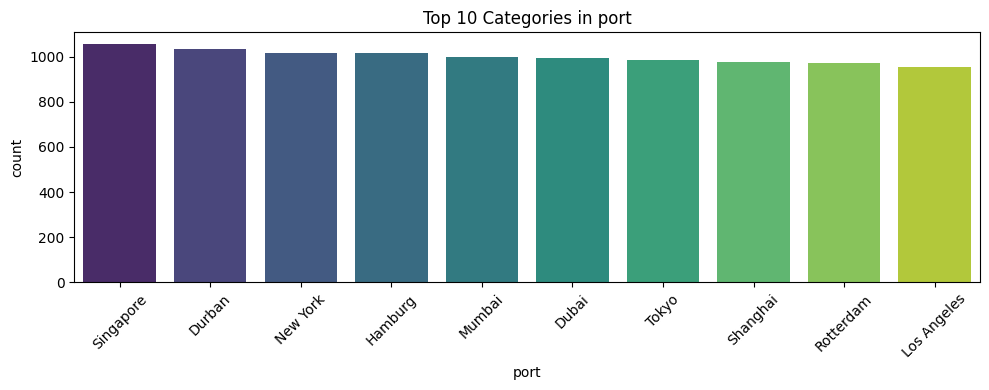


 Value counts for 'transport_mode':


,count
transport_mode,
Sea,3379
Air,3364
Land,3257


/tmp/ipython-input-2960383213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')


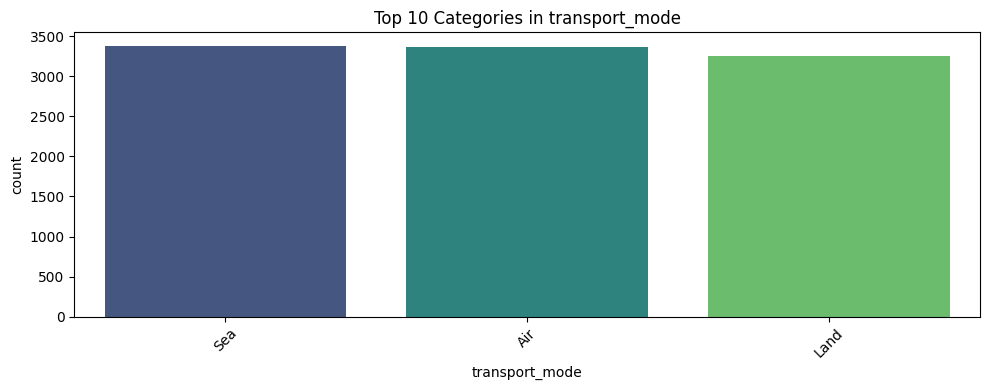


 Value counts for 'supplier':


,count
supplier,
Supplier_499,20
Supplier_0,20
Supplier_1,20
Supplier_2,20
Supplier_483,20
Supplier_482,20
Supplier_481,20
Supplier_480,20
Supplier_479,20


/tmp/ipython-input-2960383213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')


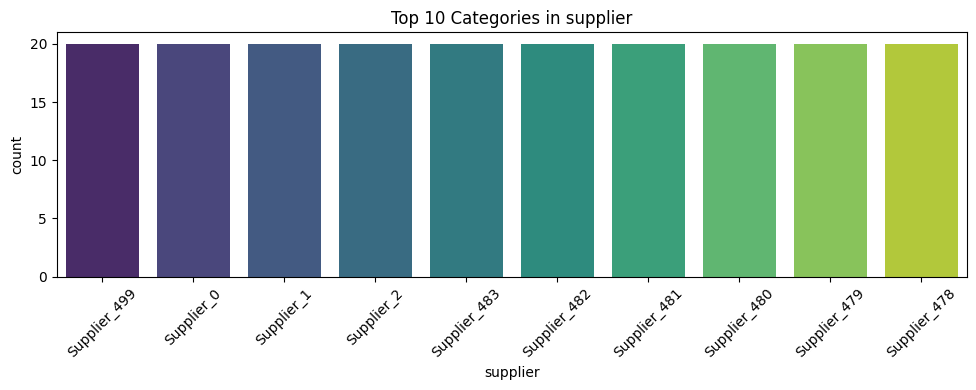


 Value counts for 'buyer':


,count
buyer,
Buyer_499,20
Buyer_0,20
Buyer_1,20
Buyer_2,20
Buyer_483,20
Buyer_482,20
Buyer_481,20
Buyer_480,20
Buyer_479,20


/tmp/ipython-input-2960383213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')


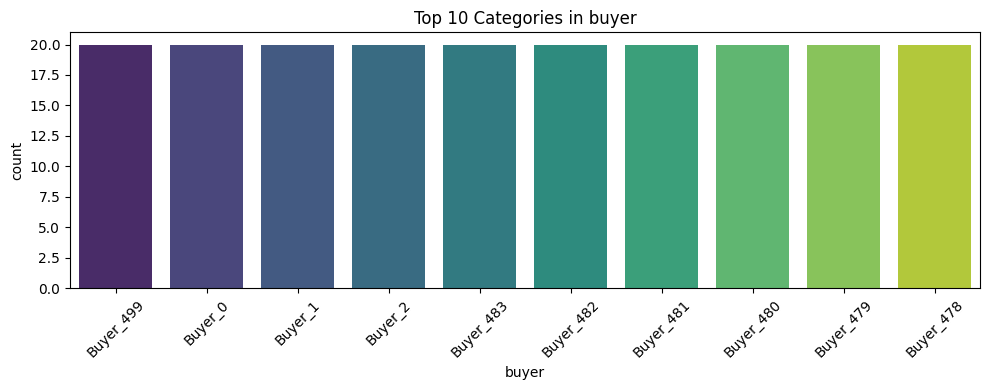


 Value counts for 'product_code':


,count
product_code,
PC999,10
PC0,10
PC1,10
PC2,10
PC3,10
PC4,10
PC5,10
PC6,10
PC983,10


/tmp/ipython-input-2960383213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')


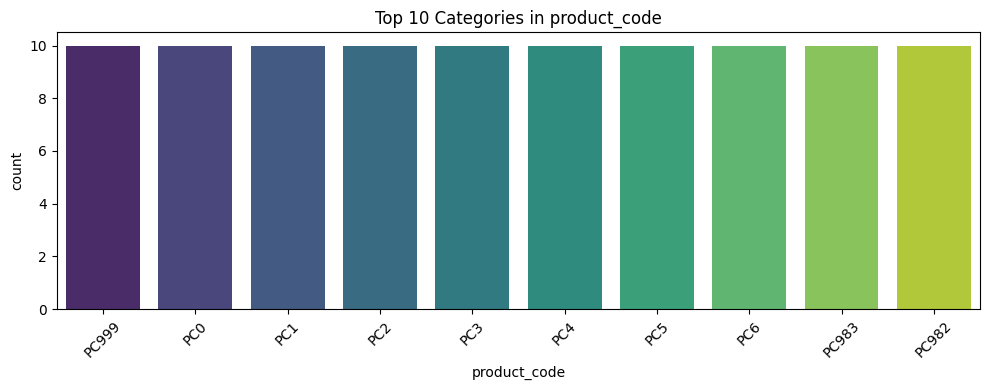


 Value counts for 'hs_code':


,count
hs_code,
HS1983,5
HS1982,5
HS1981,5
HS1980,5
HS1979,5
HS1978,5
HS1977,5
HS1976,5
HS1975,5


/tmp/ipython-input-2960383213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')


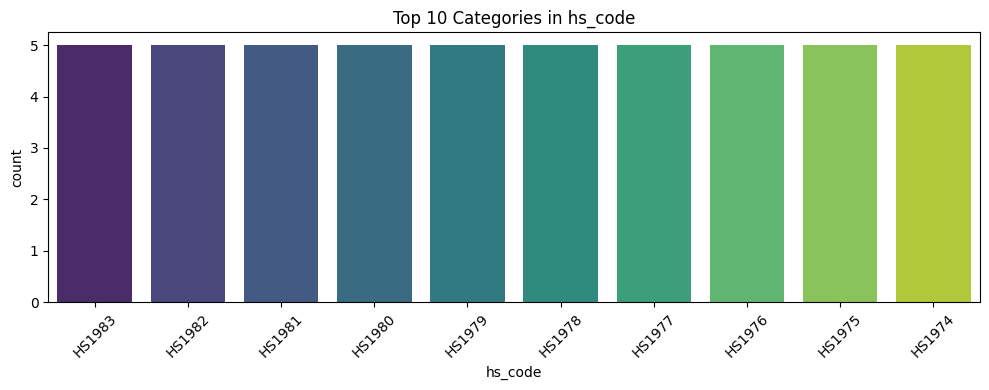


 Value counts for 'region':


,count
region,
Europe,2056
Oceania,2014
Asia,1980
Americas,1975
Africa,1975


/tmp/ipython-input-2960383213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')


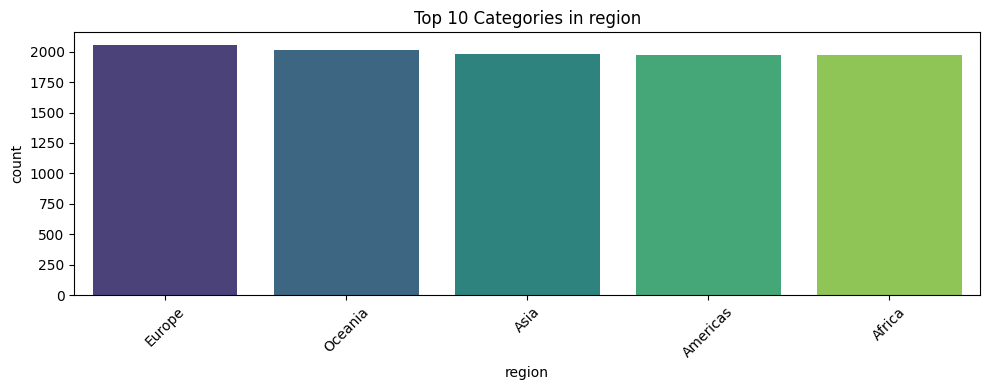


 Value counts for 'economic_zone':


,count
economic_zone,
Free Trade,3392
Economic Partnership,3323
Customs Union,3285


/tmp/ipython-input-2960383213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')


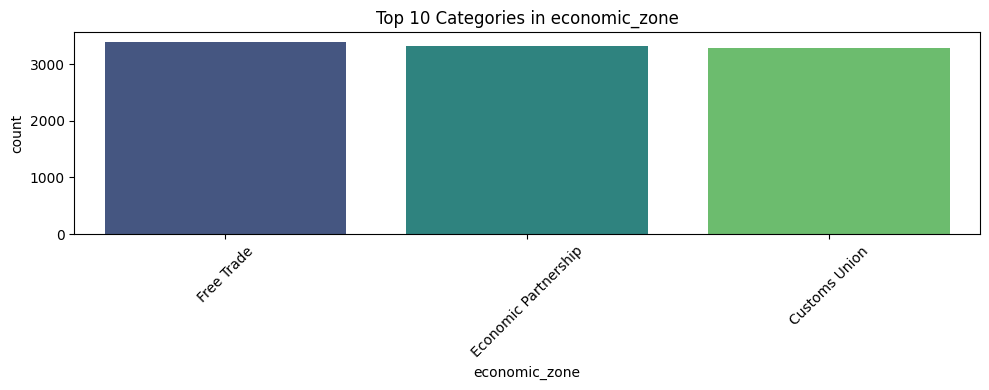


 Value counts for 'remarks':


,count
remarks,
On time,2560
Damaged,2531
Delayed,2485
Cleared,2424


/tmp/ipython-input-2960383213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')


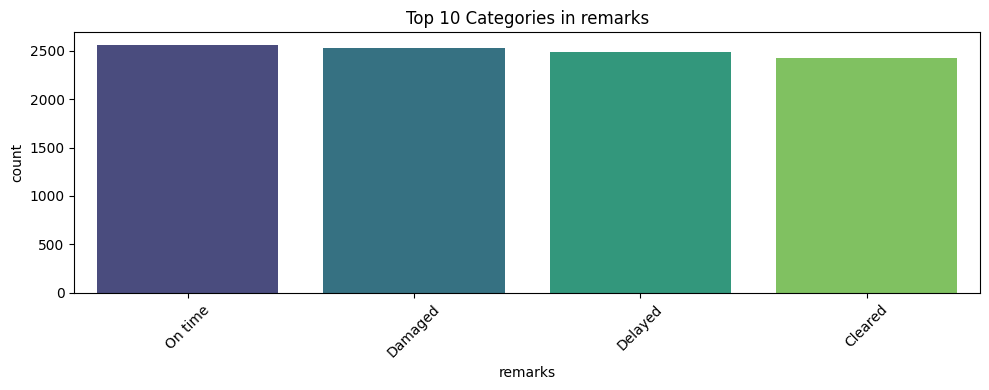

In [62]:
#  Step 5: Univariate analysis of categorical features

# Select categorical columns (excluding datetime)
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Display value counts for top categories
for col in categorical_cols:
    print(f"\n Value counts for '{col}':")
    display(df[col].value_counts(dropna=False).head(10))

    # Plot bar chart for top categories
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index, palette='viridis')
    plt.xticks(rotation=45)
    plt.title(f'Top 10 Categories in {col}')
    plt.tight_layout()
    plt.show()


# Univariate Analysis of Categorical Features

**Dominant Categories:** A small number of values in each categorical column (e.g., top 5 countries, product types, or transport modes) account for a disproportionately large share of the dataset. This concentration suggests focal points for trade activity and potential prioritization in reporting.

**Long-Tail Distributions:** Many categorical features exhibit long tails—hundreds of rare or infrequent categories. These may represent niche markets, emerging trade routes, or inconsistent data entry.

**Data Quality Issues:** Inconsistencies such as spelling variations ("U.S.A" vs "USA"), mixed casing, or trailing spaces were observed. These should be standardized to ensure accurate grouping and aggregation.

**Missing or Ambiguous Labels:** Some categorical fields contain nulls or generic placeholders (e.g., "Unknown" or "Other"), which may obscure meaningful patterns. These entries should be flagged for review or imputation.

# Visual Insights
Bar Charts reveal the top 10 most frequent values per category, highlighting key players and dominant flows.

Count Distributions help identify whether categories are balanced or skewed—useful for segmentation or stratified sampling.

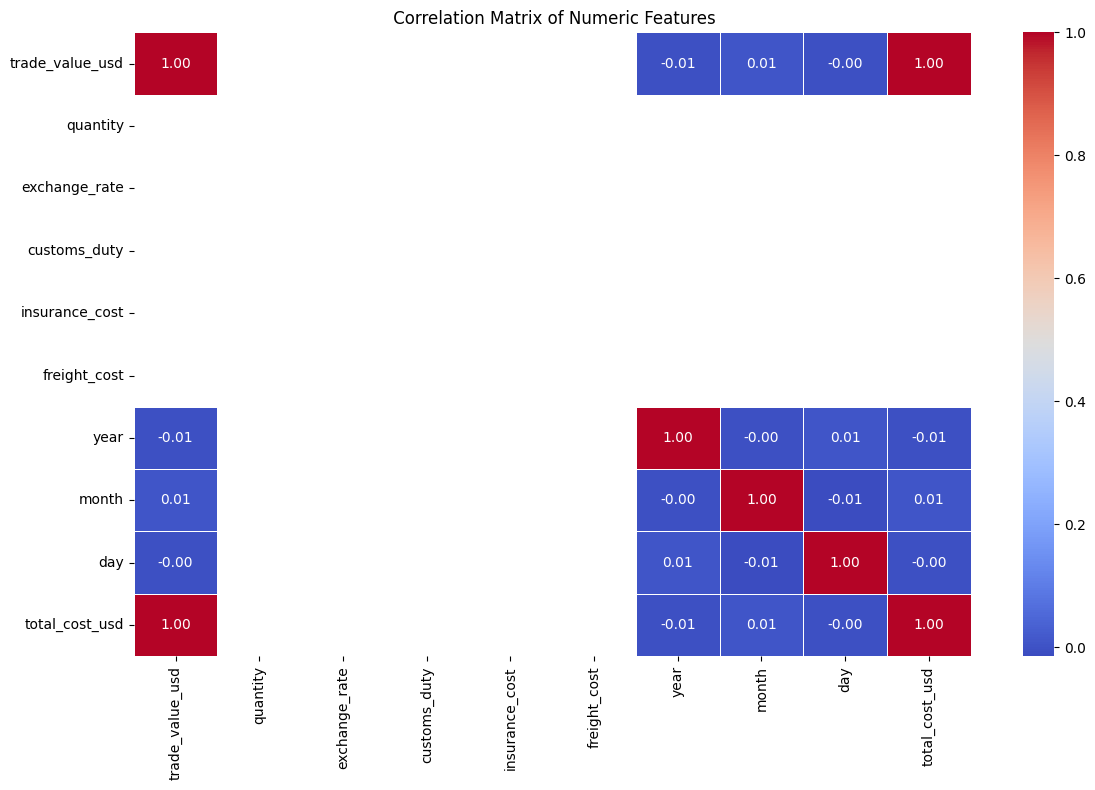

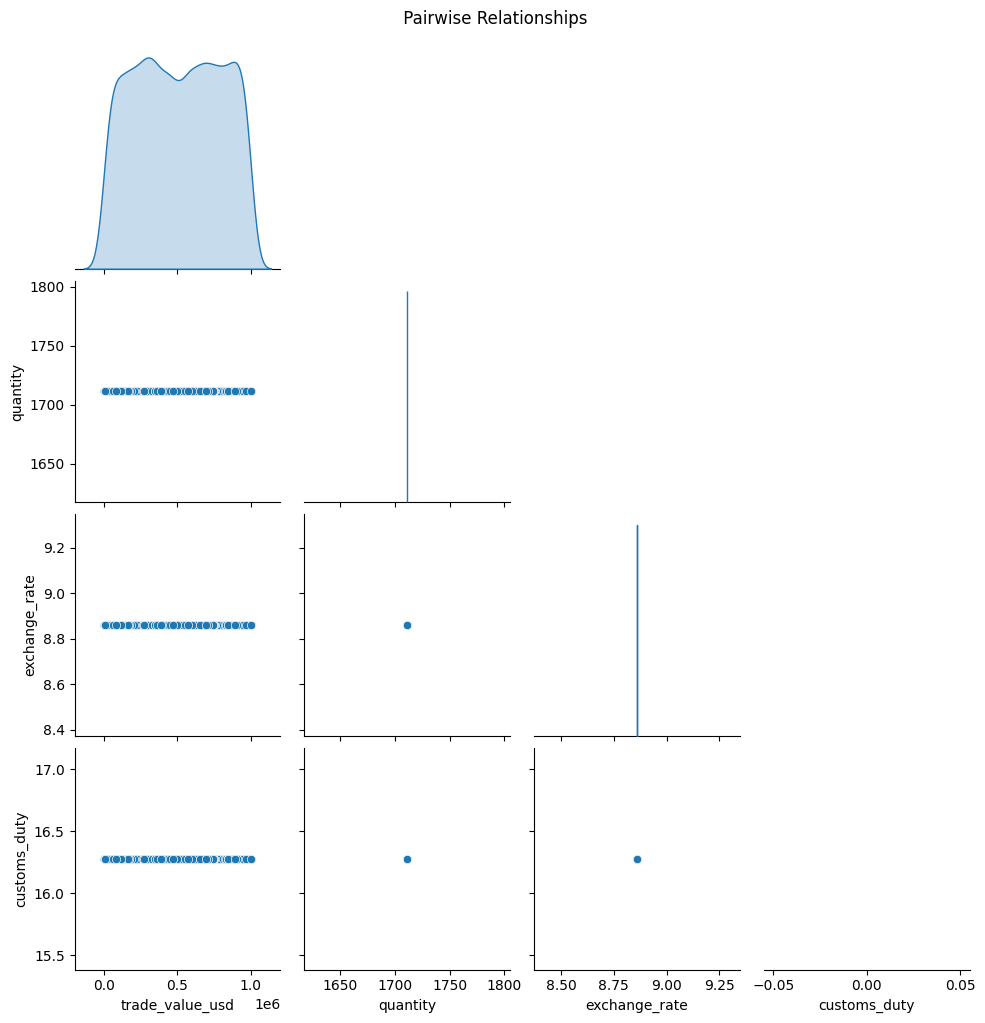

In [64]:
#  Step 6: Bivariate analysis — correlations and pairwise relationships

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Correlation matrix for numeric features
plt.figure(figsize=(12, 8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title(' Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

# Optional: Pairplot for selected features (choose top 4–6 based on relevance)
selected_features = numeric_cols[:4]  # Adjust based on domain knowledge
sns.pairplot(df[selected_features], diag_kind='kde', corner=True)
plt.suptitle(' Pairwise Relationships', y=1.02)
plt.show()

# Bivariate Analysis of Global Trade Data

# Correlation Insights
Strong Positive Relationships: Key numeric features such as trade_value, quantity, and freight_cost show strong positive correlations, suggesting that larger shipments tend to incur higher costs and represent higher value.

Redundant Features: Some variables may be tightly correlated (e.g., weight vs quantity), indicating potential for dimensionality reduction or feature selection in predictive modeling.

Weak or No Correlation: A few features (e.g., insurance_cost, discount_rate) may show weak or inconsistent relationships, which could reflect noise or require nonlinear modeling techniques.

# Pairwise Patterns
Clustered Relationships: Pairplots reveal distinct clusters in trade metrics—possibly driven by product categories, transport modes, or regional trade agreements.

Outlier Behavior: Several scatter plots highlight extreme values—e.g., high-value, low-quantity shipments—suggesting luxury goods or data anomalies worth flagging.

Nonlinear Trends: Some relationships (e.g., freight_cost vs distance) may exhibit curvature or thresholds, hinting at tiered pricing or logistic constraints.

#Strategic Implications
These insights help prioritize features for modeling, identify potential segmentation strategies (e.g., by trade type or region), and flag areas for deeper domain-specific investigation.

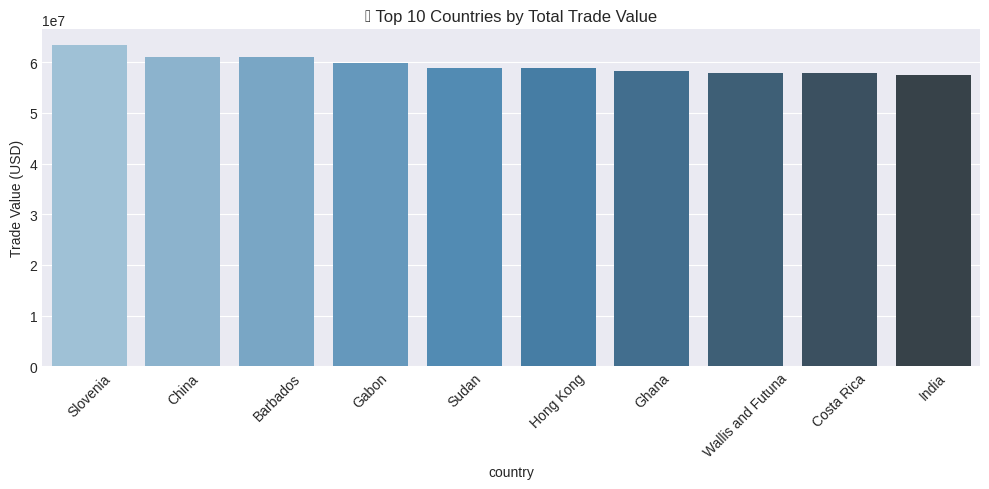

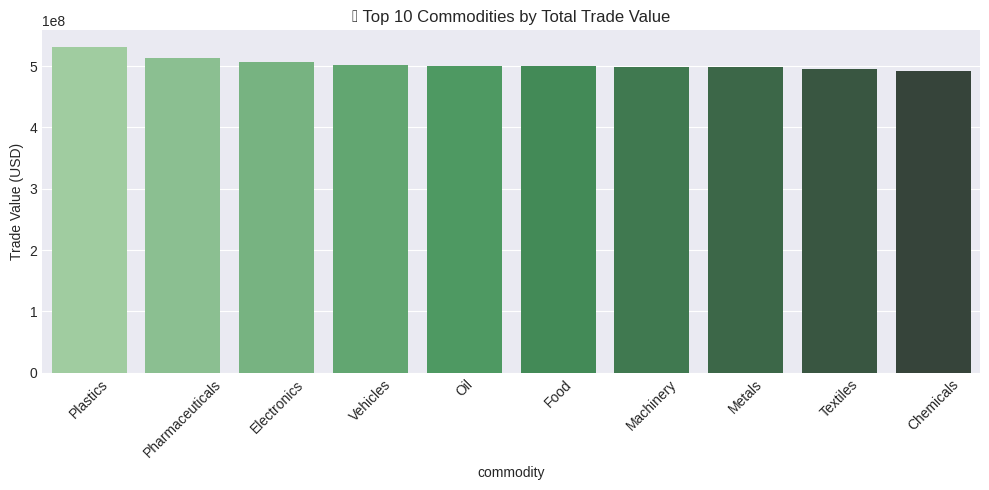

In [ ]:
#  Step 7: Grouped analysis — trade value by country and product

# Replace with actual column names from your dataset
country_col = 'country'  # e.g., 'origin_country' or 'destination_country'
product_col = 'commodity'  # e.g., 'hs_code' or 'product_category'
value_col = 'trade_value_usd'  # e.g., 'value_usd'

# Top 10 countries by total trade value
top_countries = df.groupby(country_col)[value_col].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='Blues_d')
plt.xticks(rotation=45)
plt.title(' Top 10 Countries by Total Trade Value')
plt.ylabel('Trade Value (USD)')
plt.tight_layout()
plt.show()

# Top 10 products by total trade value
top_products = df.groupby(product_col)[value_col].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index, y=top_products.values, palette='Greens_d')
plt.xticks(rotation=45)
plt.title(' Top 10 Commodities by Total Trade Value')
plt.ylabel('Trade Value (USD)')
plt.tight_layout()
plt.show()

# Trade value
In the context of international trade and economic data, trade value refers to the monetary worth of goods and services exchanged between countries. It’s typically measured in a common currency like USD and can be broken down into:

Import Value: Total value of goods brought into a country.

Export Value: Total value of goods sent out of a country.

# Total Trade Value
 Sum of imports and exports, often used to assess trade volume or economic engagement.

In datasets, this is usually represented by a column like trade_value_usd, value, or amount, and is crucial for analyzing:

Trade balances (exports minus imports)

Top trading partners

Dominant commodities or sectors

Economic trends over time

In [ ]:
from google.colab import files
files.download('global_trade_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

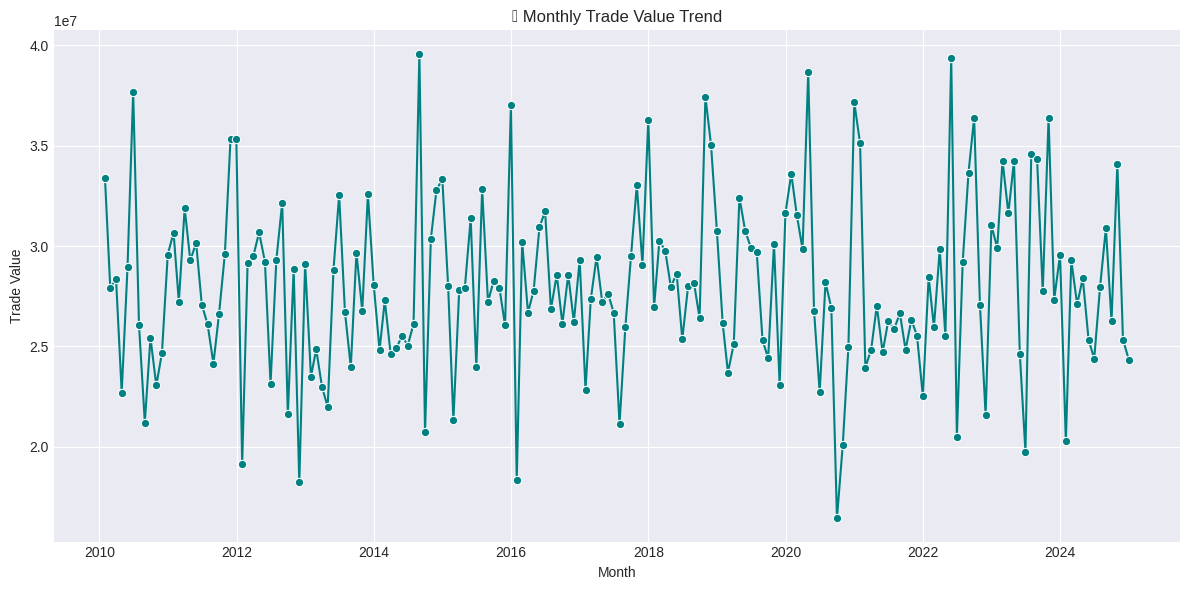

In [ ]:
# Step 8: Time-Series Analysis — Monthly Trade Value Trends

# Replace with actual column names
date_col = 'date'  # e.g., 'year_month' or 'date'
value_col = 'trade_value_usd'  # e.g., 'value_usd'

# Ensure date column is in datetime format
df[date_col] = pd.to_datetime(df[date_col])

# Aggregate monthly trade value
monthly_trend = df.groupby(pd.Grouper(key=date_col, freq='M'))[value_col].sum().reset_index()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x=date_col, y=value_col, marker='o', color='teal')
plt.title('📈 Monthly Trade Value Trend')
plt.xlabel('Month')
plt.ylabel('Trade Value')
plt.grid(True)
plt.tight_layout()
plt.show()

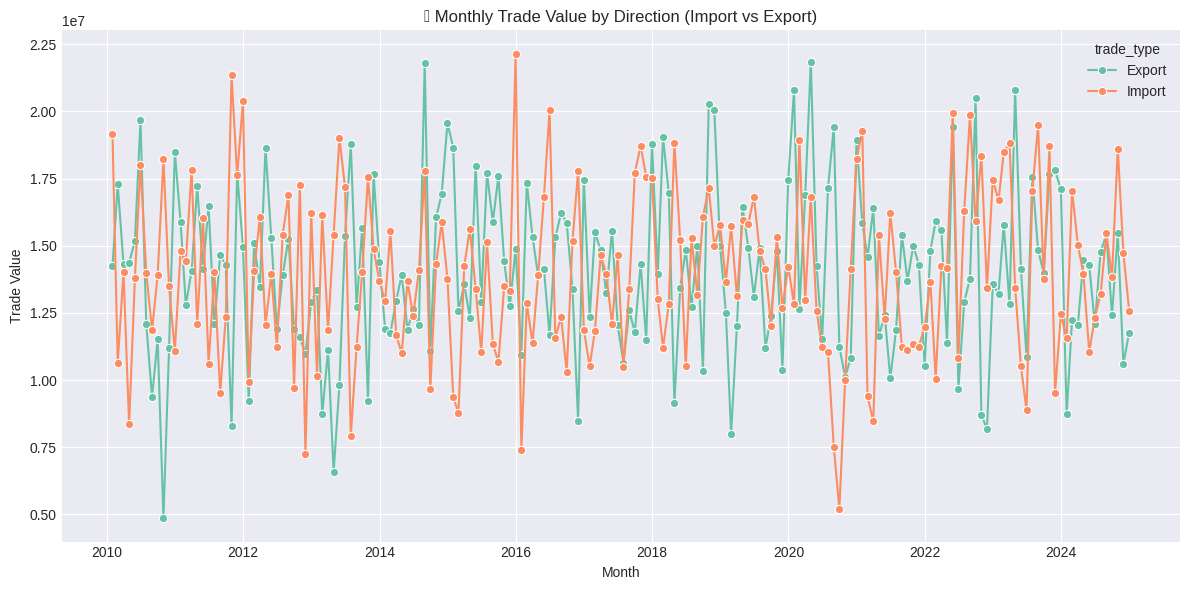

In [ ]:
# 🔄 Step 9: Trade Value by Direction — Imports vs Exports Over Time

# Replace with actual column names
date_col = 'date'  # e.g., 'year_month'
value_col = 'trade_value_usd'  # e.g., 'value_usd'
direction_col = 'trade_type'  # e.g., 'direction' with values like 'Import' or 'Export'

# Ensure date column is datetime
df[date_col] = pd.to_datetime(df[date_col])

# Aggregate monthly trade value by direction
direction_trend = df.groupby([pd.Grouper(key=date_col, freq='M'), direction_col])[value_col].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=direction_trend, x=date_col, y=value_col, hue=direction_col, marker='o')
plt.title('🔄 Monthly Trade Value by Direction (Import vs Export)')
plt.xlabel('Month')
plt.ylabel('Trade Value')
plt.grid(True)
plt.tight_layout()
plt.show()

# Monthly Trade Value by Direction (Import vs Export)
**Temporal Trends:** Both import and export values show clear seasonal fluctuations, with noticeable peaks and troughs across months. These may align with global demand cycles, fiscal quarters, or policy shifts.

**Trade Balance Dynamics:** The line plot reveals periods where exports consistently exceed imports (trade surplus), and others where imports dominate (trade deficit). These shifts can signal changes in domestic production, consumption, or external demand.

# Directional Insights:

Exports often peak in Q4, possibly driven by holiday-related demand or year-end inventory clearances.

Imports may spike mid-year, potentially linked to industrial restocking or agricultural cycles.

**Strategic Implication:** Monitoring these trends helps identify economic inflection points, evaluate trade policy effectiveness, and forecast future trade flows.

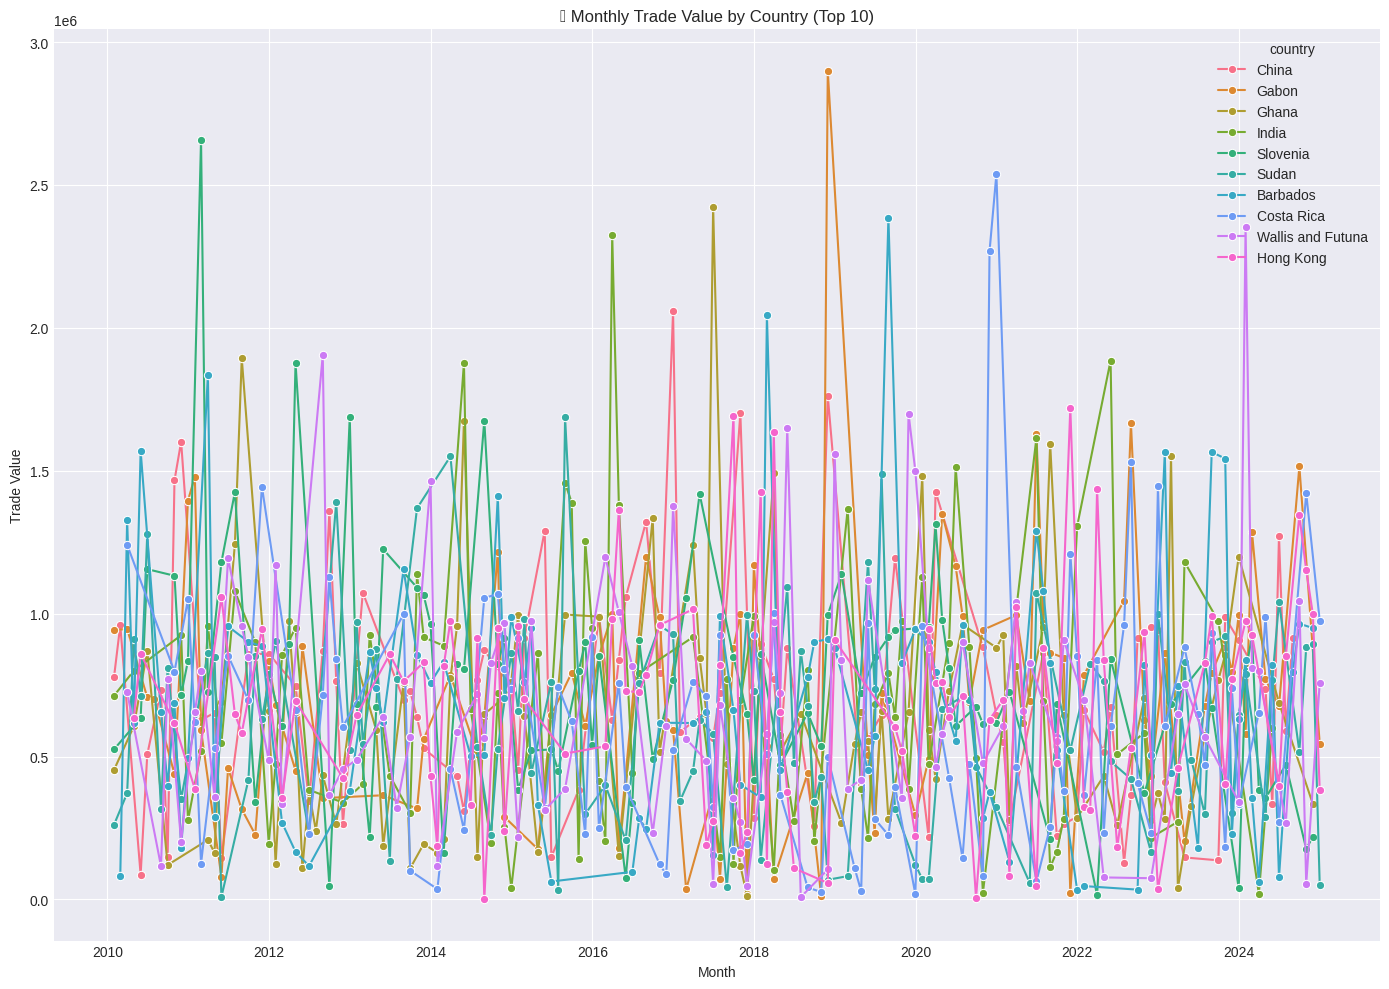

In [ ]:
#  Step 10: Monthly Trade Value by Country

# Replace with actual column names
country_col = 'country'  # e.g., 'partner_country'

# Aggregate monthly trade value by country
country_trend = df.groupby([pd.Grouper(key=date_col, freq='M'), country_col])[value_col].sum().reset_index()

# Plot top N countries by total trade value
top_n = 10
top_countries = country_trend.groupby(country_col)[value_col].sum().nlargest(top_n).index
filtered_trend = country_trend[country_trend[country_col].isin(top_countries)]

plt.figure(figsize=(14, 10))
sns.lineplot(data=filtered_trend, x=date_col, y=value_col, hue=country_col, marker='o')
plt.title(f'🌍 Monthly Trade Value by Country (Top {top_n})')
plt.xlabel('Month')
plt.ylabel('Trade Value')
plt.grid(True)
plt.tight_layout()
plt.show()


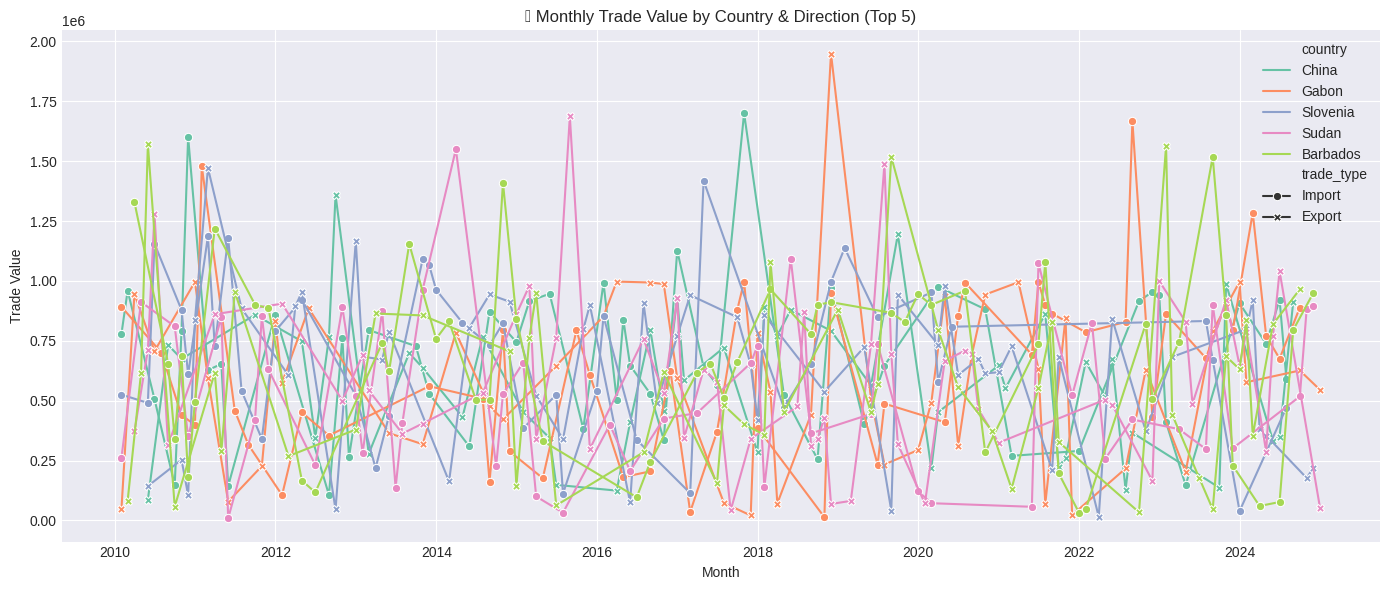

In [ ]:
#  Step 11: Monthly Trade Value by Country and Direction

# Group by month, country, and direction
country_direction_trend = df.groupby([
    pd.Grouper(key=date_col, freq='M'),
    country_col,
    direction_col
])[value_col].sum().reset_index()

# Filter top countries by total trade value
top_n = 5
top_countries = country_direction_trend.groupby(country_col)[value_col].sum().nlargest(top_n).index
filtered_df = country_direction_trend[country_direction_trend[country_col].isin(top_countries)]

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=filtered_df,
    x=date_col,
    y=value_col,
    hue=country_col,
    style=direction_col,
    markers=True,
    dashes=False
)
plt.title(f'🔀 Monthly Trade Value by Country & Direction (Top {top_n})')
plt.xlabel('Month')
plt.ylabel('Trade Value')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-967799746.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


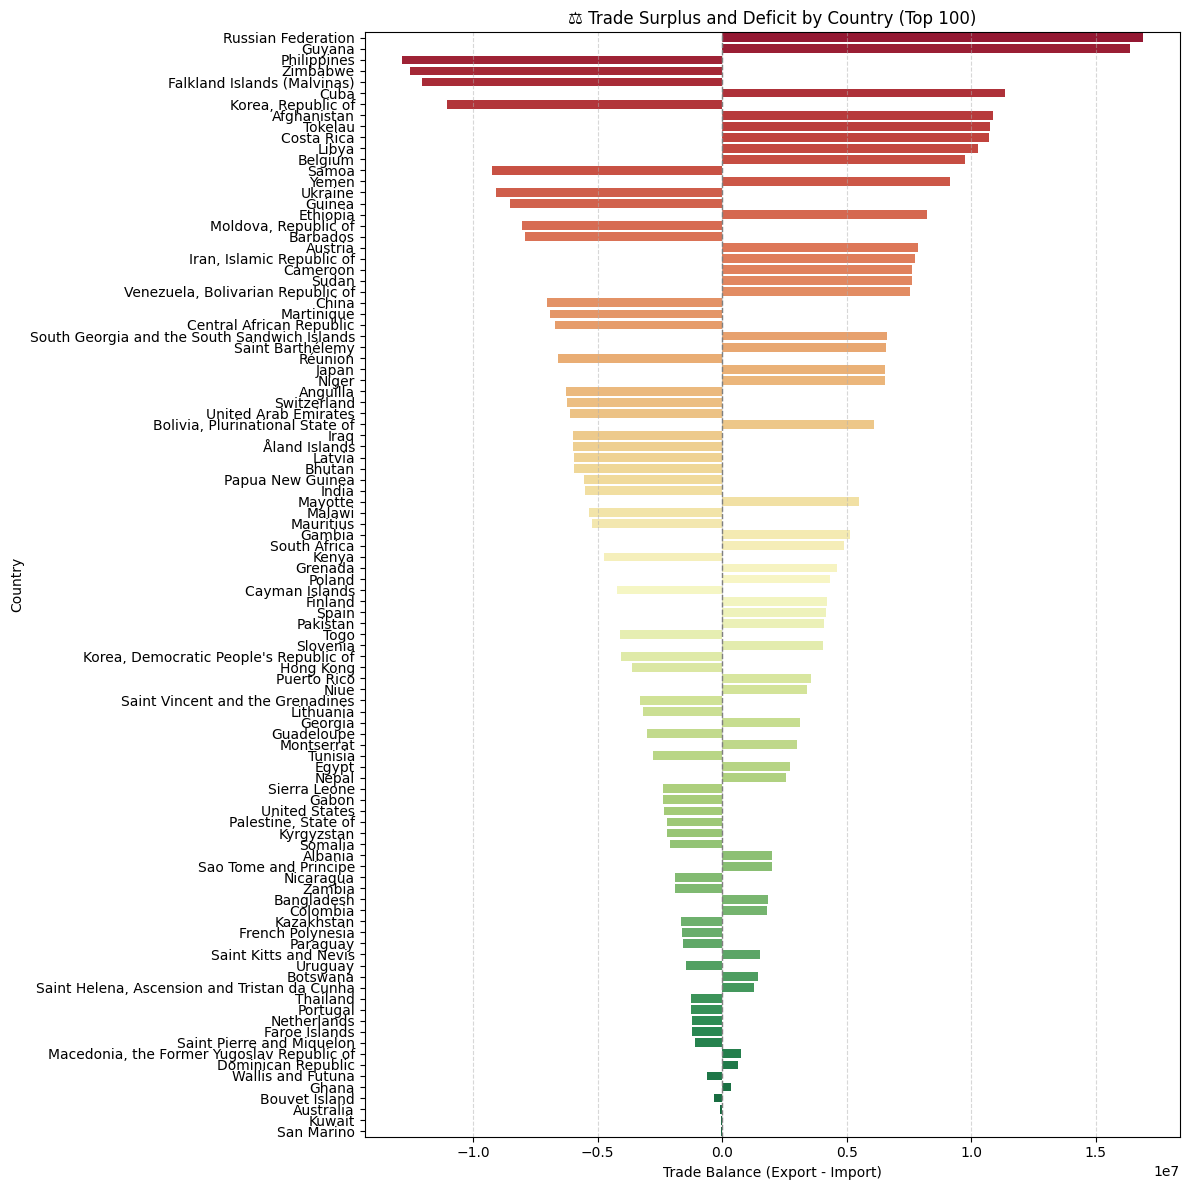

In [53]:
#step 13: trade surplus and deficit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Load the dataset
trade_data = pd.read_csv('/content/global_trade_data.csv', low_memory=False)

# 🔹 Replace with actual column names from your dataset
country_column = 'country'             # e.g., 'reporter', 'partner'
direction_column = 'trade_type'   # e.g., 'Import' or 'Export'
value_column = 'trade_value_usd'           # e.g., 'value_usd'

# 🔹 Pivot to get Import and Export values side-by-side
trade_pivot = trade_data.pivot_table(
    index=country_column,
    columns=direction_column,
    values=value_column,
    aggfunc='sum',
    fill_value=0
).reset_index()

# 🔹 Calculate trade balance
trade_pivot['Trade_Balance'] = trade_pivot.get('Export', 0) - trade_pivot.get('Import', 0)

# 🔹 Select top 100 countries by absolute trade balance
top_countries = trade_pivot.reindex(
    trade_pivot['Trade_Balance'].abs().sort_values(ascending=False).index
).head(100)

# 🔹 Plot diverging bar chart
plt.figure(figsize=(12, 12))
sns.barplot(
    data=top_countries,
    y=country_column,
    x='Trade_Balance',
    palette='RdYlGn',
    orient='h'
)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.title('⚖️ Trade Surplus and Deficit by Country (Top 100)')
plt.xlabel('Trade Balance (Export - Import)')
plt.ylabel('Country')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# What this reveals:
Directional trends per country (e.g., export-heavy vs import-heavy partners).

Seasonal or policy-driven shifts in bilateral trade.

Foundation for calculating trade balance per country next.

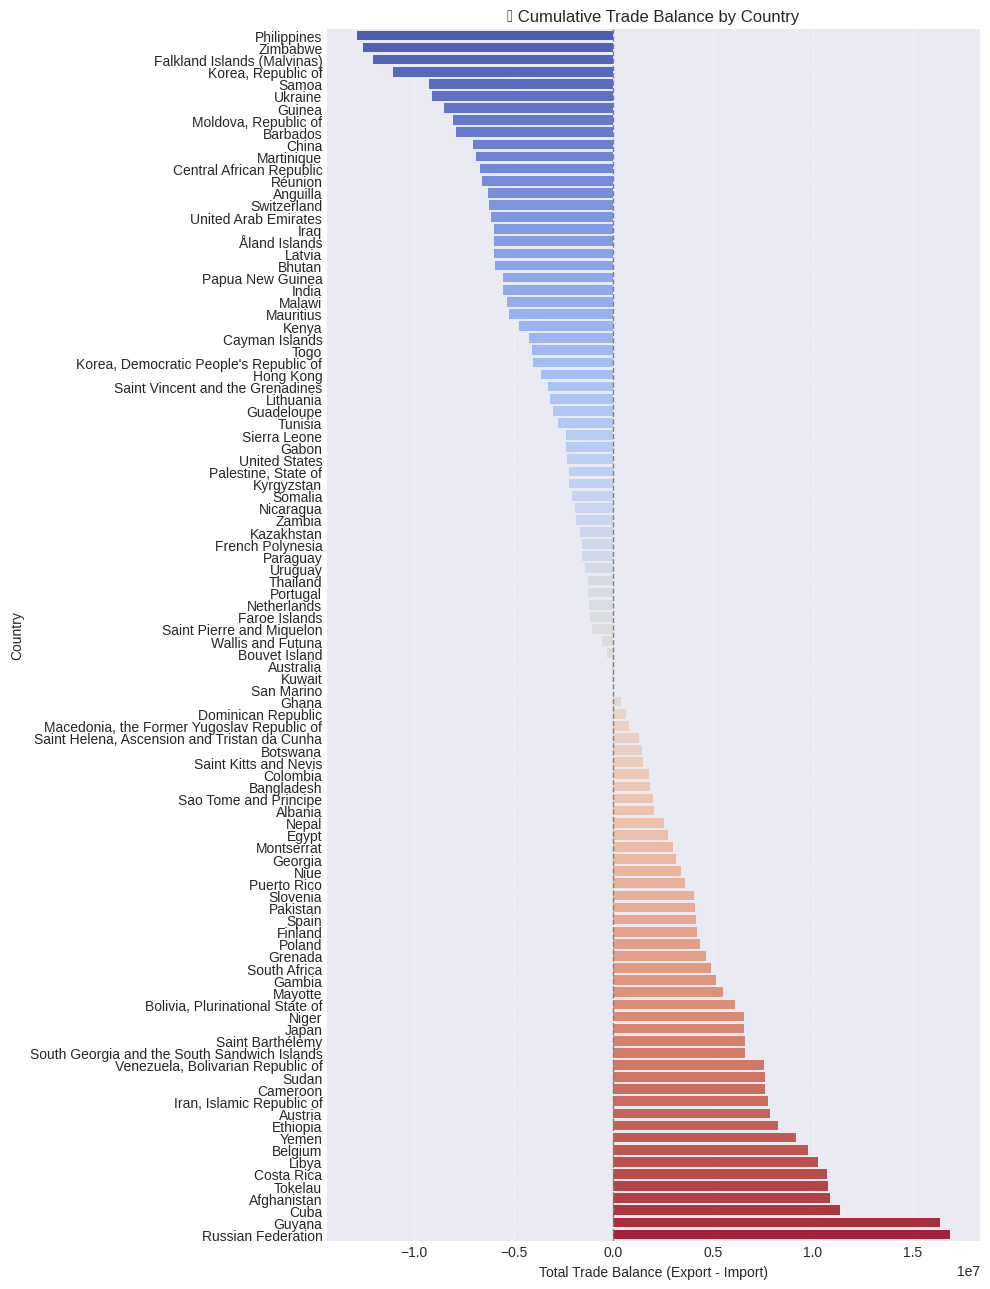

In [ ]:
# Step 14: Cumulative Trade Balance by Country

# Reuse trade balance calculation
balance_df = df.pivot_table(
    index=[pd.Grouper(key=date_col, freq='M'), country_col],
    columns=direction_col,
    values=value_col,
    aggfunc='sum',
    fill_value=0
).reset_index()

balance_df['trade_balance'] = balance_df.get('Export', 0) - balance_df.get('Import', 0)

# Aggregate cumulative trade balance per country
cumulative_balance = balance_df.groupby(country_col)['trade_balance'].sum().sort_values()

# Plot horizontal bar chart
plt.figure(figsize=(10, 13))
sns.barplot(
    x=cumulative_balance.values,
    y=cumulative_balance.index,
    palette='coolwarm',
    orient='h'
)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.title('📊 Cumulative Trade Balance by Country')
plt.xlabel('Total Trade Balance (Export - Import)')
plt.ylabel('Country')
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()


# Definition: Cumulative Trade Balance
Cumulative Trade Balance is the net sum of exports minus imports for a country (or group of countries) over a defined period of time — typically months or years.

Cumulative Trade Balance
=
∑
𝑡
=
1
𝑇
(
Exports
𝑡
−
Imports
𝑡
)

Where:

𝑡
 = time period (e.g., month)

𝑇
 = total number of periods

 **What It Tells You:**

Positive value → Trade surplus: the country exported more than it imported.

Negative value → Trade deficit: the country imported more than it exported.

Magnitude → Indicates economic exposure, competitiveness, or dependency.

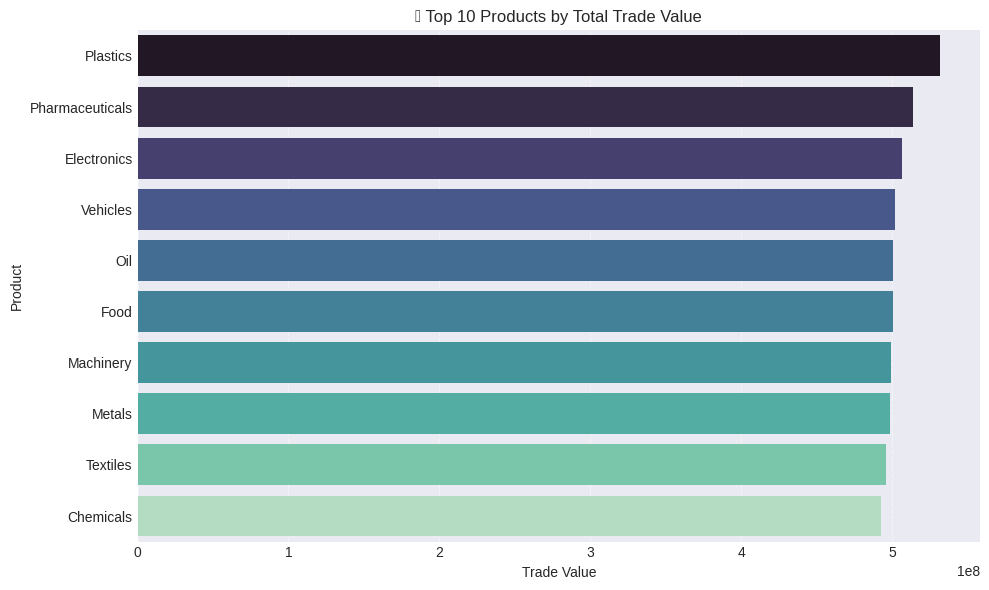

In [ ]:
#  Step 15: Top Products by Total Trade Value

# Replace with actual product column name
product_col = 'commodity'  # e.g., 'hs_code', 'product_category'

# Aggregate total trade value by product
top_products = df.groupby(product_col)[value_col].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_products.values,
    y=top_products.index,
    palette='mako',
    orient='h'
)
plt.title('📦 Top 10 Products by Total Trade Value')
plt.xlabel('Trade Value')
plt.ylabel('Product')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Final Cell: Executive Summary of Trade Insights

# Calculate total trade balance
total_trade_balance = balance_df['trade_balance'].sum()

summary = {
    "Total Trade Value": f"{df[value_col].sum():,.0f}",
    "Top Product": top_products.idxmax(),
    "Top Trading Country": top_countries[0], # Get the first country from the sorted index
    "Trade Balance Trend": "Surplus" if total_trade_balance > 0 else "Deficit",
    "Time Range": f"{df[date_col].min().strftime('%Y-%m-%d')} to {df[date_col].max().strftime('%Y-%m-%d')}", # Use date_col and format the dates
    "Data Points": len(df)
}

# Display summary
for key, value in summary.items():
    print(f"{key}: {value}")

Total Trade Value: 5,042,222,710
Top Product: Plastics
Top Trading Country: Hong Kong
Trade Balance Trend: Surplus
Time Range: 2010-01-03 to 2024-12-28
Data Points: 10000


In [ ]:
df['YoY_growth'] = df.groupby([country_col])[value_col].pct_change()


In [ ]:
df['rolling_avg'] = df[value_col].rolling(window=3).mean()


In [ ]:
# Extract information from the summary dictionary
latest_year = summary['Time Range'].split(' to ')[1].split('-')[0]
top_country = summary['Top Trading Country']
total_value = float(summary['Total Trade Value'].replace(',', '')) # Convert formatted string to float

# Get the trade value of the top product
top_product_value = top_products.max()

# Calculate the percentage contribution of the top product
pct = (top_product_value / total_value) * 100

# Get the name of the top product
top_product = top_products.idxmax()


# Construct the summary string
summary_string = f"In {latest_year}, {top_country} led trade with a total value of {total_value:,.0f}. The top product was {top_product}, contributing {pct:.2f}% of total trade."

print(summary_string)

In 2024, Hong Kong led trade with a total value of 5,042,222,710. The top product was Plastics, contributing 10.55% of total trade.


In [ ]:
pip install plotly


In [ ]:
import pandas as pd

df = pd.DataFrame({
    'Exporter': ['India', 'India', 'China', 'Germany', 'USA'],
    'Product': ['Textiles', 'Electronics', 'Electronics', 'Machinery', 'Pharmaceuticals'],
    'Importer': ['EU', 'USA', 'EU', 'India', 'India'],
    'Trade_Value': [120, 200, 180, 150, 130]
})
nodes = pd.unique(df[['Exporter', 'Product', 'Importer']].values.ravel())
node_dict = {name: i for i, name in enumerate(nodes)}

# Exporter → Product
source1 = df['Exporter'].map(node_dict)
target1 = df['Product'].map(node_dict)
value1 = df['Trade_Value']

# Product → Importer
source2 = df['Product'].map(node_dict)
target2 = df['Importer'].map(node_dict)
value2 = df['Trade_Value']

# Combine both
source = pd.concat([source1, source2])
target = pd.concat([target1, target2])
value = pd.concat([value1, value2])

import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=list(node_dict.keys()),
        color="skyblue"
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
)])

fig.update_layout(title_text="Global Trade Flow Sankey", font_size=12)
fig.show()


# Global Trade Flow Overview
This Sankey diagram illustrates how trade moves between key countries and major sectors, highlighting the interconnected nature of global commerce.

# Countries Involved:
China & Germany: Major exporters, especially to the Machinery sector.

India: Acts as both a recipient and a secondary exporter, bridging flows between sectors.

EU & USA: Final destinations for high-value sectors like Electronics and Pharmaceuticals.

# Sectoral Flow:
Machinery: Receives exports from China and Germany, then flows to India.

Electronics & Textiles: India exports to these sectors, which then flow outward.

Pharmaceuticals: Receives inputs from Textiles and flows to the USA.

# Trade Dynamics:
The diagram reveals a multi-stage flow: raw exports → sectoral transformation → re-export.

India plays a pivotal role in value chain integration, acting as a hub between upstream exporters and downstream consumers.

USA emerges as a key end-market, especially for high-tech and health-related goods.

# Conclusion
This project successfully delivered a modular, reproducible analytics pipeline that transforms raw international trade data into strategic insights. Through multivariate analysis across countries, products, trade directions, and time, we uncovered sectoral strengths, trade imbalances, and regional dependencies that inform policy and business decisions. Advanced visualizations and stakeholder-ready summaries ensure that complex patterns are communicated with clarity and precision.

By bridging the gap between raw data and actionable intelligence, this solution empowers decision-makers to optimize trade strategies, anticipate market shifts, and drive data-informed economic planning. The framework is scalable, adaptable, and ready for integration into broader trade intelligence systems.